# Data Structure

Below you can find a schematic summary of the folders' organization for this lesson

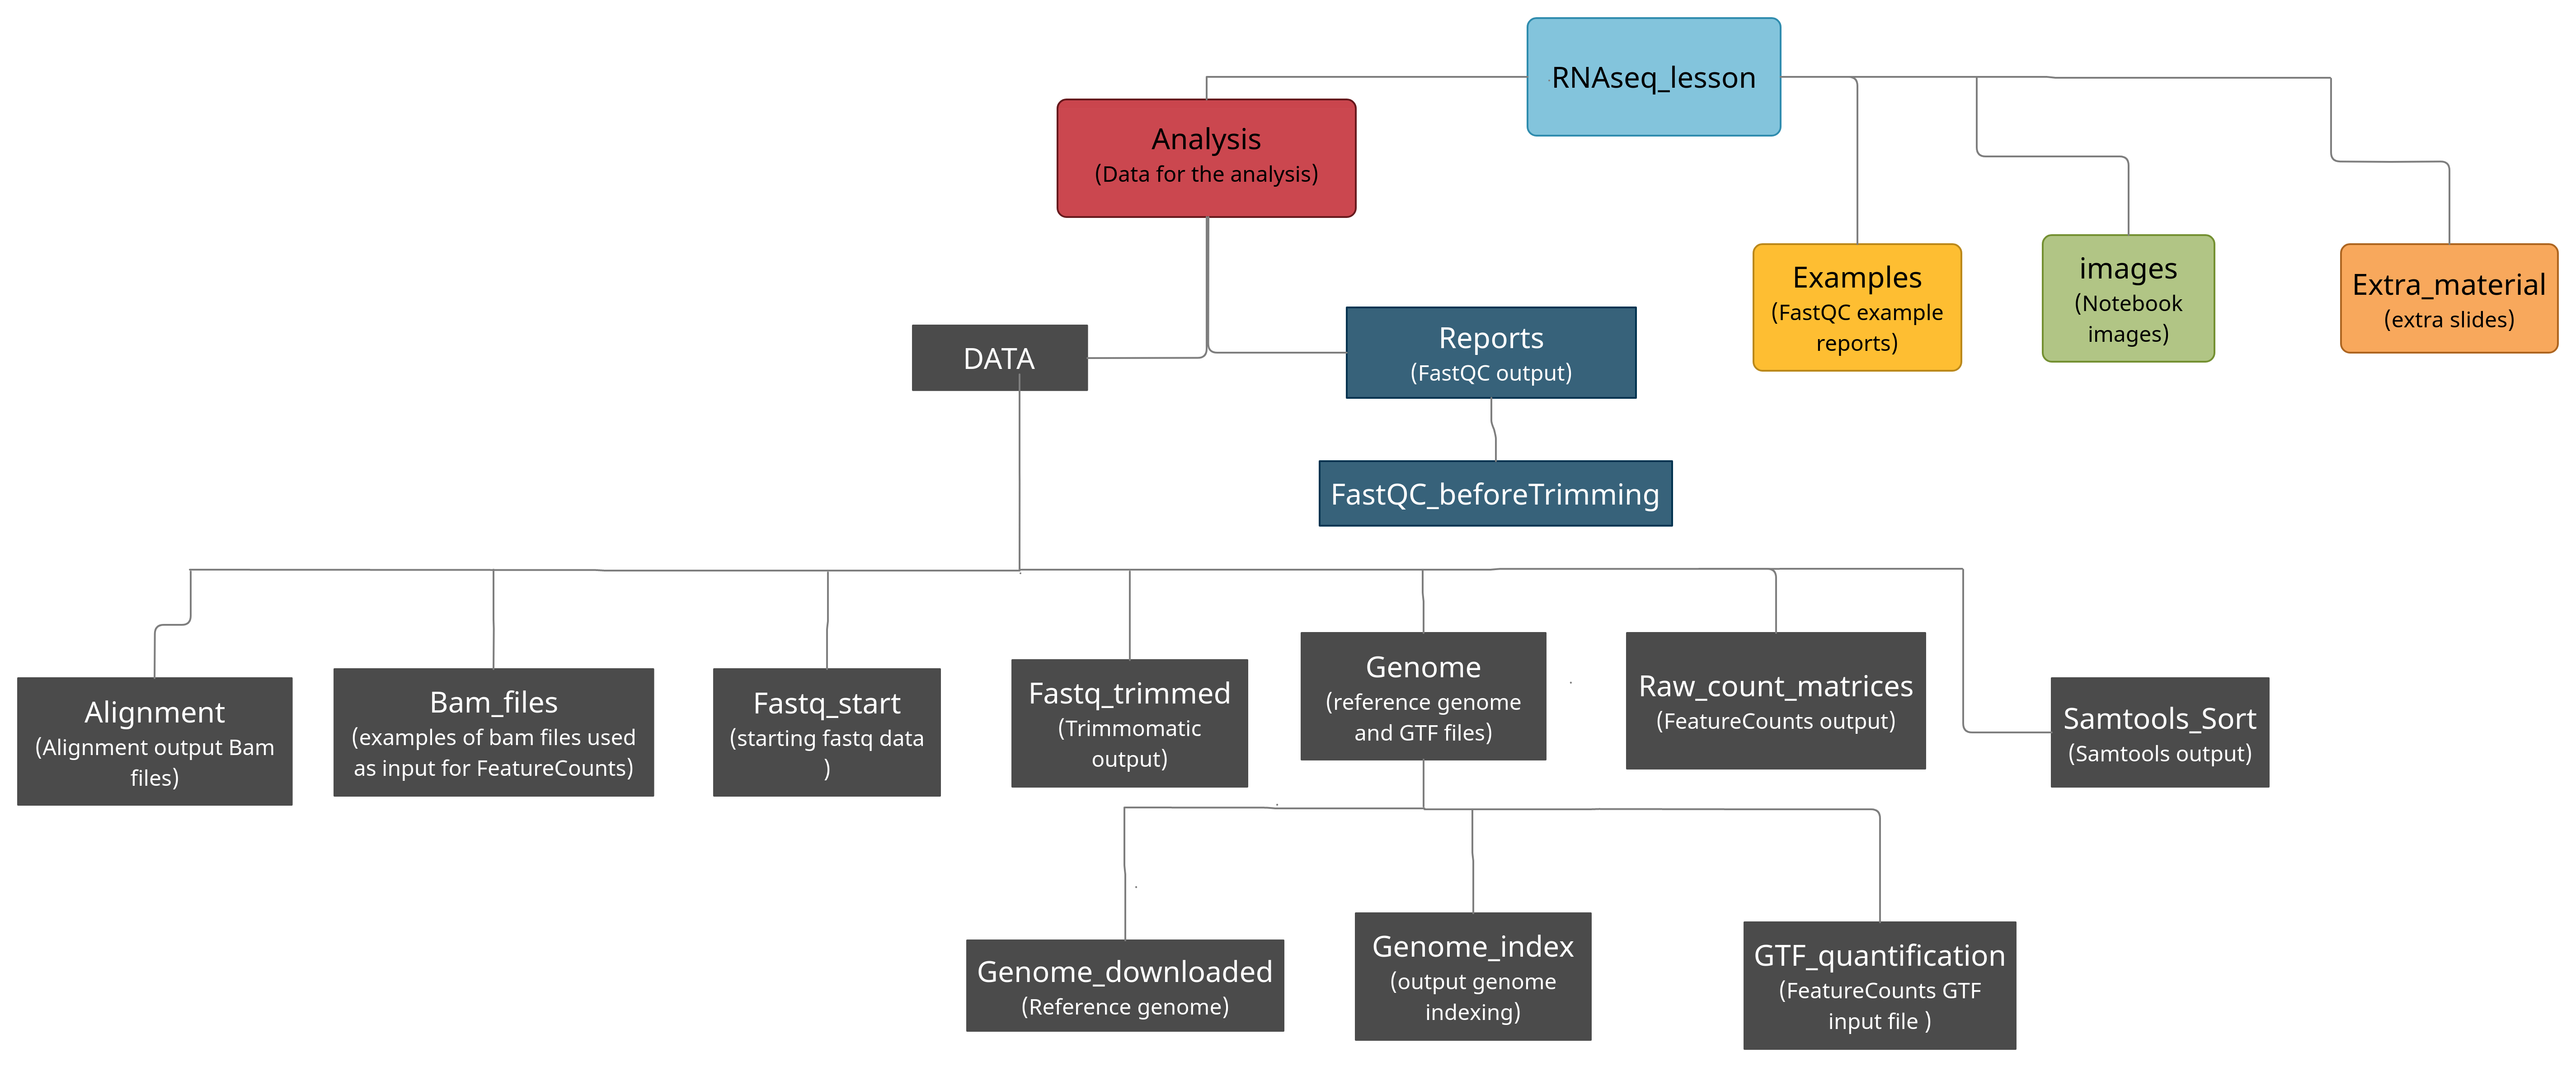

# Sequencing 

Genomic sequencing allows to determine the exact nucleic acid sequence contained in our cells.
Today, the knowledge of genomic sequences is the basis of almost all biological and medical research fields like 
Molecular Biology, Virology, Evolutionary Biology and Forensics.  

The sequencing technology evolves very quickly leading to a constant improvement in performance and an ever greater reduction in costs.  

![](./images/mooreLaw.png)



At today, there exist a lot of different companies specialized in sales and development of sequencing technologies, the most famous are:

- [Illumina](https://www.illumina.com/)
- [QIAGEN](https://www.qiagen.com/it/)
- [Oxford Nanopore](https://nanoporetech.com/)

Each company developed different sequencing pipelines but in general we can say that the modern sequencing methods (Next Generation Sequencing) can be summarized in three main steps:

- Library preparation;
- Amplification;
- Sequencing reaction  

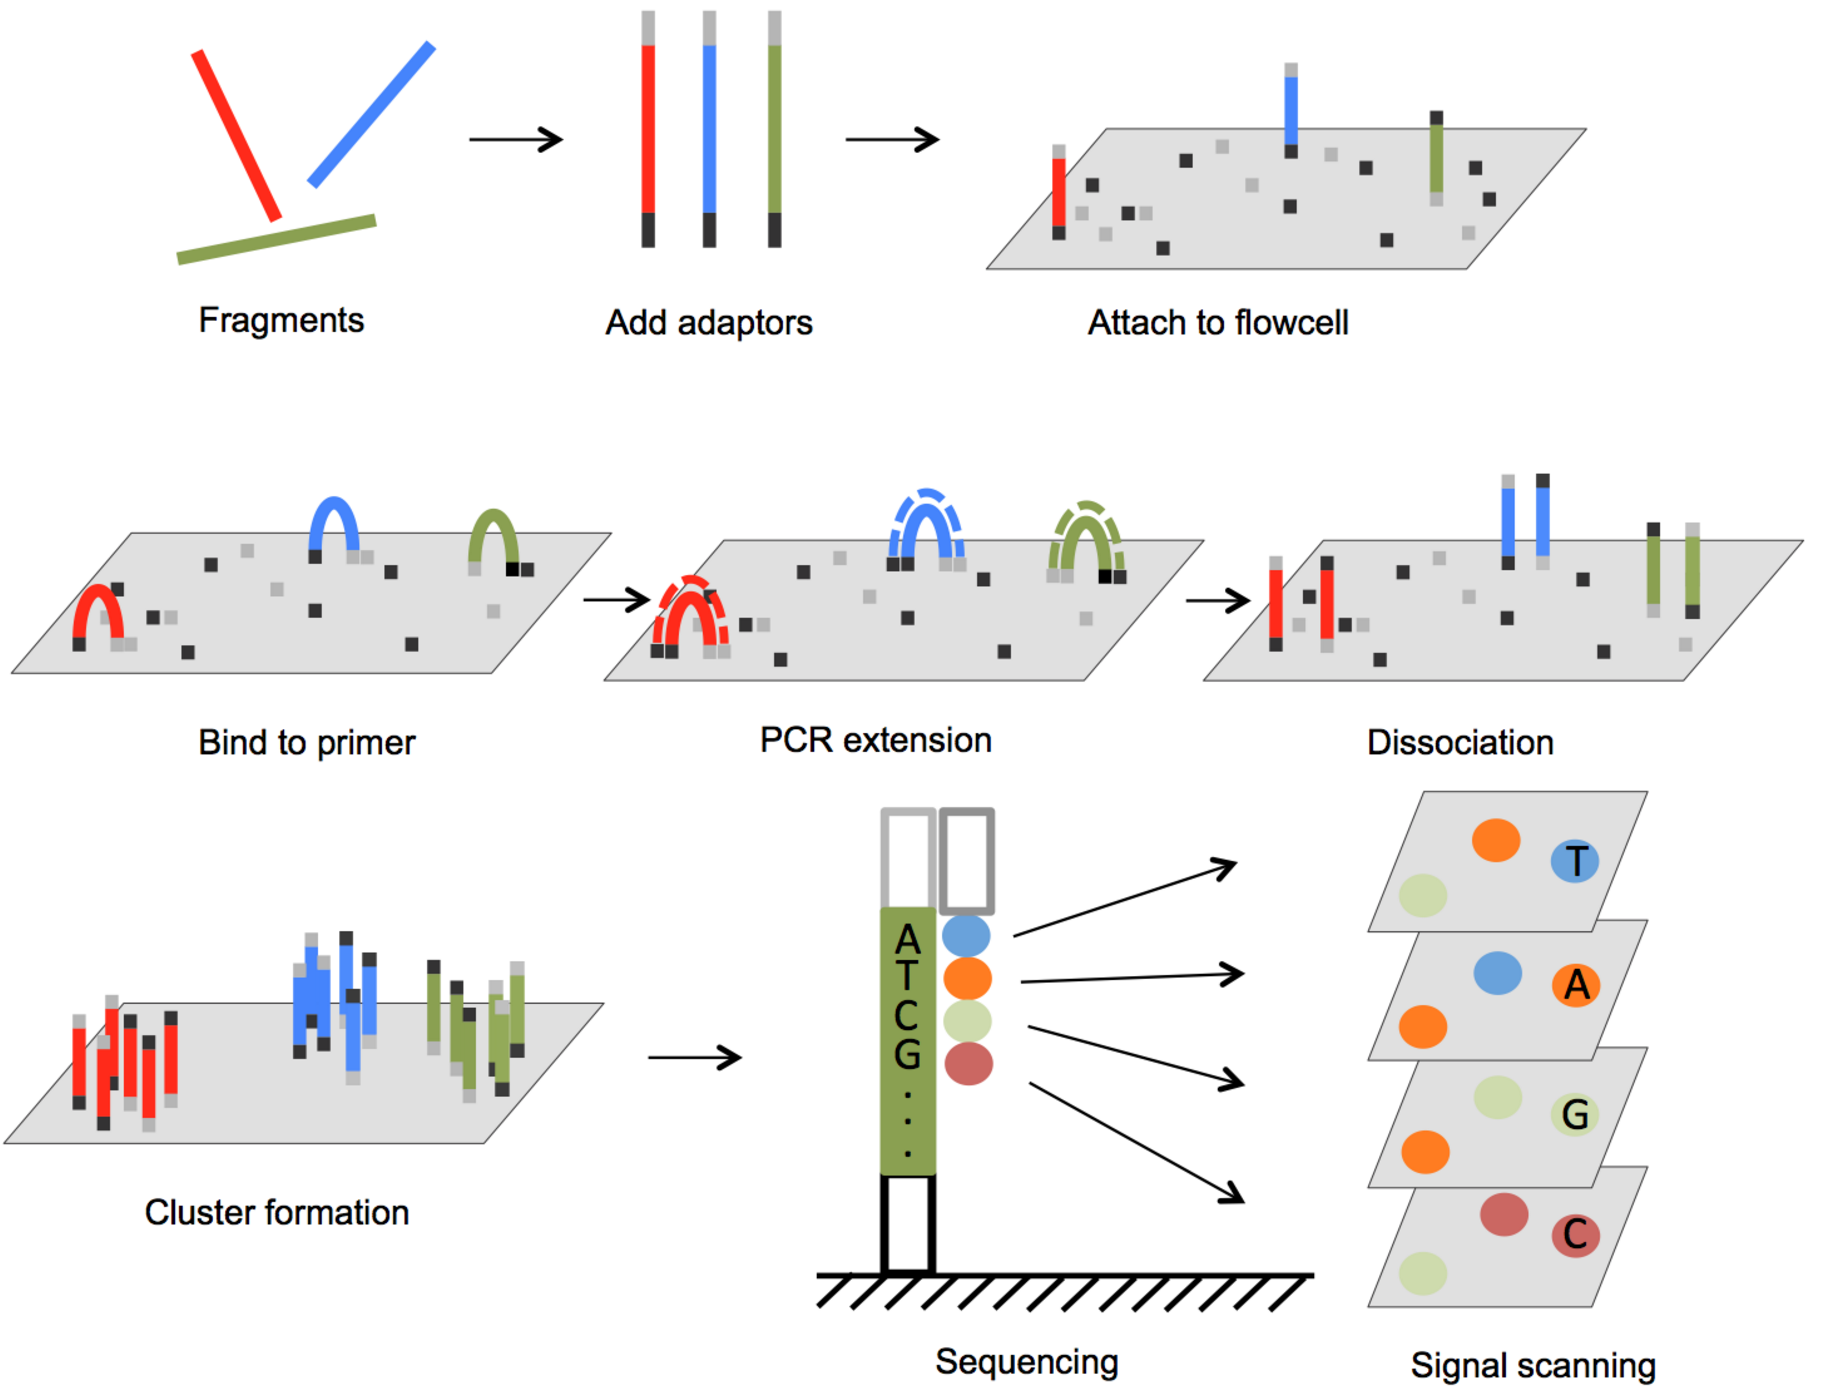
### Library preparation 
The DNA sample is prepared by a process of random fragmentation. The fragments (usually called reads) obtained are added to preset sequences,known as <strong>adapters</strong>, that are necessary to anchor and immobilize the DNA to a support on which the sequencing reaction will take place.  
DNA fragments prepared by the addition of adapters constitute the so-called sequencing library.

### Amplification 

sequencing library fragments are incorporated into a microscopic bubble of water together with the so-called enrichment beads (small balls to which adapters can bind). Amplification reaction (PCR) takes place in these aqueous microbubbles, where genomic fragments are amplified many times.

### Sequencing reaction  
Sequencing reaction takes place thanks to extremely complex mechanisms running on a microlitric scale.


## Sequencing approaches
Sequencing can be done following two different approaches:  

- single-end 
- paired-end

### Single-end
The sequencer reads each fragment from only one end to the other generating one sequence of bases.
This approach is less accurate but also less expensive respect to the paired-end approach.

### Paired-end
The sequencer starts to read the fragment, finishes this direction at a specified read length and then starts another round of reading from the opposite end of the fragment.  
This approach improves the degree of accuracy in the identification of insertions, deletions, inversion and structural rearrangements.
However, this approach is more expensive than the single-end one and also this degree of accuracy may not be required for all the experiments.  

<strong>NB</strong>:Today we will work with paired-end reads.


![](./images/singlevspairend.png)

## Sequencing output (Fastq)
Sequencing output is a set of files (usually one for each sample sequenced) in Fastq format.
This format universally used to represent raw sequencing data in the bioinformatics community.
Each file contains the set of reads (genomic fragments generated during the library preparation) representing the genome of the considered sample.
Fastq file consists of four lines for each read:

- <strong>line 1</strong>: begins with a ‘@’ character and is followed by a sequence identifier and
an optional description;
- <strong>line 2</strong>: is the sequence of the read itself;
- <strong>line 3</strong>: begins with a ‘+’ character and is optionally followed by the same sequence
identifierr (and any description) again;
- <strong>line 4</strong>: is the quality score of the bases in the second line, it must contain the
same number of symbols as letters in the sequence;


![](./images/fastq.png)

## Experimental Data
Bioinformaticians work starts now after the acquisition of raw data (Fastq files).
In our experiment we have 33 different samples: 

- 10 healthy controls 
- 11 mild cognitive impairment subjects (MCI)
- 12 Alzheimer's disease patients (AD)

For further information about the samples you can check the introduction [slides](./Introduction_RNAseq.pdf).  

The samples were sequenced with the paired-end sequencing approach so, at the end, we have two Fastq files for each sample, one for each reading direction of the reads.
In total we have 66 Fastq files each of then of size 3GB (more or less).  
In order to reduce the computational effort and time we will try the most expensive steps of the analysis only with a subset of the original samples.  

## Quality Control
The first step of the bioinformatics analysis is to check the sequencing results and make a quality control analysis of the reads obtained.  
FastQC is one of the most used tool for this specific step of the analysis. It provides a modular set of analyses which you can use to give a quick impression of whether your data has any problems of which you should be aware before doing any further analysis.  
FastQC tool takes in input different type of data including Fastq files and creates an HTML permanent report which contains the results of the quality control analysis (summary graphs and tables) providing a quick overview and showing you in which reads' areas there may be problems. ([FastQC's website](https://www.bioinformatics.babraham.ac.uk/projects/fastqc/))  

Below, you can find the python code to generate the FastQC report for each fastq file in the ~/Data/Fastq/Fastq_start directory  


In [1]:
import os  
import subprocess

cwd = os.getcwd()
print(cwd)

/home/simone/Documents/PhD/RNAseq_Lesson


In [ ]:
import subprocess  
import os #import os library useful to run bash command

cwd = os.getcwd()
input_dir = cwd + "/Analysis/Data/Fastq_start/"
out_dir = cwd + "/Analysis/Reports/FastQC_beforeTrimming/"

for sub_dir in os.listdir(input_dir):
    for file in os.listdir(input_dir+sub_dir):
    
      if not os.path.exists(out_dir+file[0:4]): #check if the path exists
        os.makedirs(out_dir+file[0:4])         #create a directory for each sample in the out_dir

      input = input_dir+sub_dir+'/'+file    
      print(out_dir+file[0:4])
      subprocess.call('fastqc '+ input + ' --outdir ' + out_dir+file[0:4], shell=True) #run FastQC on each fastq in the directory

Here you have two examples of HTML report file for the sample T112:  
[FastQC's example read1](./Examples/T112_combined_R1_fastqc.html)  
[FastQC's example read2](./Examples/T112_combined_R2_fastqc.html) 

We have to check if, in our html reports, there are features highlighted in red or yellow.  
Here you can find a very quick guide which describe the main features to consider inside the report ([click here](./Extra_material/FastQC.pdf)).  

In our samples we can observe that the "Per base sequence content" and the "Sequence Duplication Levels" are highlighted in red. This is something that we have to take into account but, in general, we can say that the plots show profiles common between the majority of the sequencing.
In general we can say that these profiles are due to the high number of reads that we have for each sample (>> 20M) and also to some technical issues but we can also say that it is not necessary to apply corrections in order to mitigate these issues.  

However, one aspect that is very important to consider, is the possible presence of the adapters in our reads.
If the adapters are still inside our reads we have to remove them to avoid problems in the next steps of the analysis.
We can check the presence of the adapters observing in the report if there are repetitive sequences identified as adapters or if the "Adapter content" section shows something strange in the curve profile (usually highlighted in red).  
In our case we can observe that some of the repetitive sequences are recognized as adapters.

To remove the adapters we proceed with the next step of the analysis called Trimming.


## Trimming
Trimming step is not always necessary.
During this step we applied different type of corrections such as removing adapters or not good regions inside the reads, usually generated due to technical problems during the sequencing.  
We can perform this pre-processing step with different tools:

- Cutadapt
- Trimmomatic

In this lesson we will use [Trimmomatic](http://www.usadellab.org/cms/uploads/supplementary/Trimmomatic/TrimmomaticManual_V0.32.pdf).  

To work, Trimmomatic requires you to have installed a recent version of java. The tool provides a lot of different parameters useful to cut reads' regions and in particular in our experiment we are interested in removing adapters applying ILLUMINACLIP step.  
ILLUMINACLIP requires you to specify which adapters to remove, in our case we will use "TruSeq3-PE-2.fa" adapters file.  
You can find different adapters files to use inside the Trimmomatic tool folder. Usually we have to select the adapters file taking into account if we have paired-end reads or single-end reads and also the file version, choosen considering the specifics of the sequencing (usually the most recently updated file).  


Other important parameters are:

- PE: to specify that we are working with paired-end reads
- -threads: to specify the number of threads to use
- -baseout: to specify the the output filenames base (including the file extension)
- the two input reads files of each sample.



In [ ]:
import re
import os
import subprocess
cwd = os.getcwd()

dir = cwd + "/Analysis/Data/Fastq_start/"
adapters = "ILLUMINACLIP:/usr/share/trimmomatic/TruSeq3-PE-2.fa:2:30:12" # ILLUMINACLIP information

for sub_dir in os.listdir(dir):
    for file in os.listdir(dir+sub_dir):

        if file.endswith('R1.fastq.gz'):
            R1 = dir + sub_dir + "/" + file   #take read1 file
        else:
            R2 = dir + sub_dir + "/" + file   #take read2 file
        
    name = re.search("(.+?)_combined", file).group(1)    # extract sample name
    if os.path.isdir(cwd + "/Analysis/Data/Fastq_trimmed/" +name):   #check if there is a sample name directory
        print("Existing dir: "+name)
    else:
        os.mkdir(cwd + "/Analysis/Data/Fastq_trimmed/"+name)   #create the sample name directory

    out_dir = cwd + "/Analysis/Data/Fastq_trimmed/" + name+"/"

    subprocess.call('TrimmomaticPE -threads 6 ' + R1 + ' ' + R2 + ' -baseout ' + out_dir + name +'.fastq.gz' + ' '+ adapters, shell=True)


The numbers specified after the adapters' file show that initially Trimmomatic will look for seed matches (16 bases) allowing maximally 2 mismatches. These seeds will be extended and clipped if in the case of paired end reads a score of 30 is reached, or in the case of single ended reads a score of 12.    
  
### Trimmomatic output

Since we are working with paired-end reads, the tool's output consists of four different files:

- mySampleFiltered_1P.fq.gz-for paired forward reads
- mySampleFiltered_1U.fq.gz-for unpaired forward reads
- mySampleFiltered_2P.fq.gz-for paired reverse reads
- mySampleFiltered_2U.fq.gz-for unpaired reverse reads

where 'paired' files contain the reads both survived to the processing while 'unpaired' files correspond to the read survived but whose read partner did not.

![](./images/Trimmomatic.png)   

 <strong>NB</strong>: in the next steps of the analysis we will work only with the paired files.  
 
 
 
## Second Quality Control 

To make sure you have removed all the adapters, is always a good choice to use FastQC to check the trimming results.
Following you can find an example of FastQC HTML report after adapters removal.    

Below you can find an example of HTML report for sample T112 (read1) after trimming:  
[FastQC's trimmed example read1](./Examples/T112_1P_fastqc.html) 


## Alignment


As we know, sequencing produces a collection of fragments without genomic context and we don't know to which part of the genome the sequences correspond to.  
What we are going to do is to map the reads of each sample to reference genome.   
With the mapping, reads are assigned to a specific location in the genome and insights like the expression level of genes can be estimated.

Alignment is one of the most challenging topic in Bioinformatics which requires a good compromise between precision and efficiency in term of computational resources (memory, computational time), you will see some of the most famous alignment algorithms in the Algorithms course.  

![](./images/Alignment.png)

The most famous tools used for this step of the analysis are:

- BWA
- Bootie
- STAR 

Their efficiency changes respect to the length of the reads that we want to map and also respect to the species reference genome that we want to use.  
In our case we will use STAR tool which is very efficient and accurate in mapping long reads (as ours) to the human reference genome.

<strong>NB</strong>: STAR requires a lot of RAM, usually for Human genome alignment it needs ~32 GB so pay attention to run it on your PC!  


### Reference Genome

Human reference genome is a digital genome assembled in laboratory, it doesn’t represent the genetic sequence for any one individual, but is made up of a combination of several people’s DNA. When we sequence a patient’s genome and compare it to the reference genome, we assume that the reference represents the ‘normal’ sequence, and therefore any identified variation could be responsible for problems.  
The human reference genome is continuously evolving. Since the Human Genome Project, it has been updated in line with new information and knowledge thanks to the collaboration of scientists around the world, and it is currently in its 38th iteration. 
Reference genomes are free and can be downloaded from the web.

### GFF/GTF File Format

Now, we have the reads which are like sentences in a text and we want map them inside a book (reference genome) but our book has no index therefore search a word inside  it could be very expensive in terms of time.  

The idea is to index our reference genome before to start the mapping.  
To index the reference genome we need a GFF (general feature format) or GTF (general tranfer format) file in which are stored all the information about genomic features.
These files consists of one line for each feature, each containing 9 columns of data, plus optional track definition lines.
The 9 fields for each feature, tab separated are: 

- <strong>seqname</strong> - name of the chromosome or scaffold; chromosome names can be given with or without the 'chr' prefix. Important note: the seqname must be one used within Ensembl, i.e. a standard chromosome name or an Ensembl identifier such as a scaffold ID, without any additional content such as species or assembly. See the example GFF output below.
- <strong>source</strong> - name of the program that generated this feature, or the data source (database or project name)
- <strong>feature</strong> - feature type name, e.g. Gene, Variation, Similarity
- <strong>start</strong> - Start position* of the feature, with sequence numbering starting at 1.
- <strong>end</strong> - End position* of the feature, with sequence numbering starting at 1.
- <strong>score</strong> - A floating point value.
- <strong>strand</strong> - defined as + (forward) or - (reverse).
- <strong>frame</strong> - One of '0', '1' or '2'. '0' indicates that the first base of the feature is the first base of a codon, '1' that the second base is the first base of a codon, and so on..
- <strong>attribute</strong> - A semicolon-separated list of tag-value pairs, providing additional information about each feature.


There exists a lot of different GTF/GFF files each of one contains different information necessary for different type of analysis ([Gencode example](https://www.gencodegenes.org/human/)).  

### Reference Genome indexing

Each of the tools mentioned above allows to index the reference genome, below you find the code to do it with STAR.



In [ ]:
import os
import subprocess
cwd = os.getcwd() #return the current path 

subprocess.call('STAR  --runThreadN 6 --runMode genomeGenerate --genomeDir ' + cwd+ '/Analysis/Data/Genome/Genome_index  --sjdbGTFfile ' + cwd+'/Analysis/Data/Genome/Genome_downloaded/Homo_sapiens.GRCh38.103.chr.gtf --genomeSAindexNbases 12  --genomeFastaFiles ' + cwd +'/Analysis/Data/Genome/Genome_downloaded/Homo_sapiens.GRCh38.dna.chromosome.10.fa', shell=True)

The parameters are very simple, the tool requires the fasta file of the reference genome, a GTF or GFF file and the output folder where you will find your indexed genome files.   
To speedup the indexing step you can run it in parallel specifying an higher number of threads. In the [STAR manual](https://github.com/alexdobin/STAR/blob/master/doc/STARmanual.pdf) you can find the complete list of parameters.  

<strong>NB</strong>: in the example, in order to speedup the indexing, we are working only with chromosome 10 of the genome.

### Genome alignment

After the reference genome indexing we can proceed by mapping the trimmed reads on the genome.  
Using STAR we can run the following code:

In [4]:
import os
import subprocess

cwd = os.getcwd()
dir = cwd + '/Analysis/Data/Fastq_trimmed/'
for sample in os.listdir(dir):
    sample_dir = dir + sample + '/'
    for file in os.listdir(sample_dir):
        if file.endswith('1P.fastq.gz'):
            R1 = sample_dir + file     #take read1 file
        if file.endswith('2P.fastq.gz'):
            R2 = sample_dir + file     #take read2 file
            
    subprocess.call('STAR  --runThreadN 15 --genomeDir ' + cwd+ '/Analysis/Data/Genome/Genome_index --readFilesIn ' + R1 +' ' + R2 +  ' --outFileNamePrefix ' + cwd + '/Analysis/Data/Alignment/T308_  --outSAMtype BAM SortedByCoordinate --outSAMunmapped Within --outSAMattributes Standard --readFilesCommand zcat', shell=True)   


<strong>NB</strong>: if the percentage of uniquely mapped reads is around 85% the alignemnt is fine, otherwise we have to go back and try to check if there are some factors that do not allow a good alignment (high duplication level, adapters not removed ...).  


## Alignment output 

The alignment step could produce different output files with different formats. The most common are:

- SAM
- BAM 

### SAM file







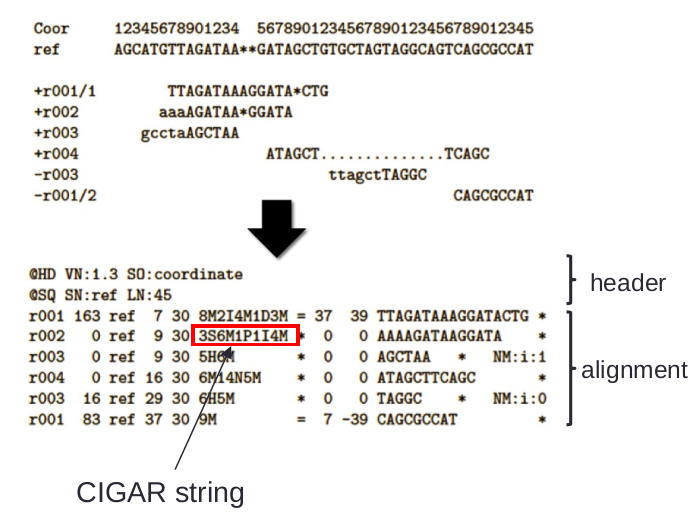
SAM is a text based format used to store sequences aligned to a reference sequence, it is a TAB-delimited text format consisting of a header section, which is optional, and an alignment section.  
If present, the header must be prior to the alignments. (header lines start with ‘@’, while alignment lines do not).  
Each alignment line has 11 mandatory fields for essential alignment information such as mapping position, and
variable number of optional fields for flexible or aligner's specific information.


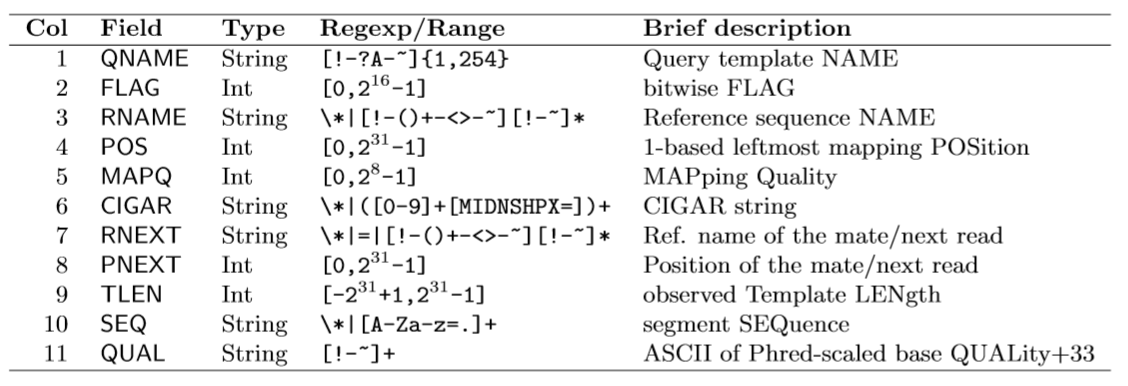

### BAM file

BAM file is compressed binary representation of the SAM file and it contains exactly the same information.  
The only difference between the two type of extension is that SAM is a human-readable format while BAM is only machine readable.


## SAMTools

SAMtools provides various utilities for manipulating alignment files like SAM and BAM formats.  
It provides complex tasks such as sorting, indexing, data extraction and format conversion.  
Below you can find an example of the tool's functionality in which we sort the reads in a BAM file by name.

In [ ]:
import subprocess
import os
cwd = os.getcwd()


dir = cwd + '/Analysis/Data/Bam_files/'
for file in os.listdir(dir):
    sample = file[0:4]   #extract sample name
    print(sample)
    bam= dir+file

    subprocess.call('samtools sort -n -o ' + cwd + '/Analysis/Data/Samtools_Sort/' + sample+'.bam'+ ' -@ 4 ' + bam, shell=True)


## Quantification

After that we have aligned all the reads to the Human Reference Genome we are ready quantify how many reads have been mapped to coding regions/genes.  
The idea is to count how many reads are aligned to a specific gene's sequence for each sample and create a raw count matrix in which each row is a gene, each column is a sample and each value is the count of reads mapped in that specific gene's region for each sample.  
The most used tools for this analysis' step are:

- HTSeq
- featureCounts

In this course we will use featureCounts which is part of the Subread package in R.  
This tool, also available from command line, takes as input one or more BAM/SAM files and a GTF annotation file and it outputs numbers of reads assigned to features and the overall summarization results creating a raw count matrix.


In [ ]:
import os
import subprocess

cwd = os.getcwd()
subprocess.call('featureCounts -T 5 -p -a '+ cwd + '/Analysis/Data/Genome/GTF_quantification/gencode.v36.primary_assembly.annotation.gtf -o ' + cwd + '/Analysis/Data/Raw_count_matrices/raw_matrix.txt ' + cwd + '/Analysis/Data/Bam_files/*.bam', shell=True)


In addition to the input files, GTF file and the output file we have to specify that we are working with paired-end reads using the parameter -p.
For a complete overview of all the parameters check the
[featureCounts manual](http://www.bioconductor.org/packages/release/bioc/vignettes/Rsubread/inst/doc/SubreadUsersGuide.pdf)

<strong>NB</strong>: we have a good quantification result if the successfully assigned alignments are greater than 55%/60% (percentage of reads mapped in exonic regions).